In [1]:
import pandas as pd 

In [2]:
data= pd.read_csv("D:/DSBA/Project/DSBA_Project/Unit2_Project_Morshed_Rezaul/Datasets/housing.csv")

In [3]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Housing Data Profiling Report")
profile.to_file("Housing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
import dtale

d = dtale.show(data)
d.open_browser()

In [7]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# Create Train & Test Data set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Randomly split the data into training and test sets
train, test = train_test_split(data, test_size=0.2, random_state=12312)

print(train.shape)
print(test.shape)

(16512, 10)
(4128, 10)


In [10]:
data["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [11]:
import numpy as np

bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf]

data["income_cat"] = pd.cut(data["median_income"], bins, labels=[1, 2, 3, 4, 5])

In [12]:
data[["median_income", "income_cat"]].sample(10)

,median_income,income_cat
111,2.6429,2
10250,3.7361,3
10219,4.5000,3
10485,6.1260,5
17593,3.6563,3
15567,5.4663,4
9205,3.0224,3
13596,2.5625,2
1112,1.6250,2
6848,3.7857,3


In [13]:
data["income_cat"].value_counts() / len(data)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [14]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=12312)
strat_train_set, strat_test_set = train_test_split(data, test_size=0.2, random_state=12312, stratify=data["income_cat"])

In [15]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)


income_cat_proportions(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [16]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)


compare_props = pd.DataFrame(
    {
        "Overall": income_cat_proportions(data),
        "Stratified": income_cat_proportions(strat_test_set),
        "Random": income_cat_proportions(test_set),
    }
).sort_index()

compare_props["Rand. %error"] = (
    100 * compare_props["Random"] / compare_props["Overall"] - 100
)
compare_props["Strat. %error"] = (
    100 * compare_props["Stratified"] / compare_props["Overall"] - 100
)

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.036822,-7.542579,0.364964
2,0.318847,0.318798,0.312984,-1.838626,-0.015195
3,0.350581,0.350533,0.344719,-1.672195,-0.013820
4,0.176308,0.176357,0.185804,5.386095,0.027480
5,0.114438,0.114341,0.119671,4.572396,-0.084674


In [17]:
housing = strat_train_set.drop("income_cat", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

print(housing.shape)
print(housing_labels.shape)

(16512, 10)
(16512,)


# Data Cleaning

### 1) Missing Value Handling


In [18]:
housing.isnull().any(axis=1).sum()

160

In [19]:
housing[housing.isnull().any(axis=1)].sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4767,-118.37,34.03,37.0,1236.0,NaN,966.0,292.0,3.0694,122200.0,<1H OCEAN
7168,-118.17,34.06,43.0,464.0,NaN,416.0,120.0,2.4750,142600.0,<1H OCEAN
9877,-121.85,36.61,38.0,238.0,NaN,191.0,67.0,1.3897,125000.0,<1H OCEAN
18261,-122.08,37.37,29.0,1229.0,NaN,707.0,194.0,7.1108,465000.0,NEAR BAY
17973,-121.95,37.31,27.0,4140.0,NaN,2135.0,893.0,3.6292,264600.0,<1H OCEAN
10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,105200.0,INLAND
14386,-117.23,32.75,5.0,1824.0,NaN,892.0,426.0,3.4286,137500.0,NEAR OCEAN
4391,-118.27,34.07,27.0,1190.0,NaN,1795.0,422.0,1.7016,160000.0,<1H OCEAN
19638,-120.97,37.43,27.0,1380.0,NaN,810.0,262.0,2.1875,137500.0,INLAND
19833,-119.38,36.53,38.0,1281.0,NaN,1423.0,293.0,1.9602,51400.0,INLAND


In [20]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        160
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [21]:
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inline

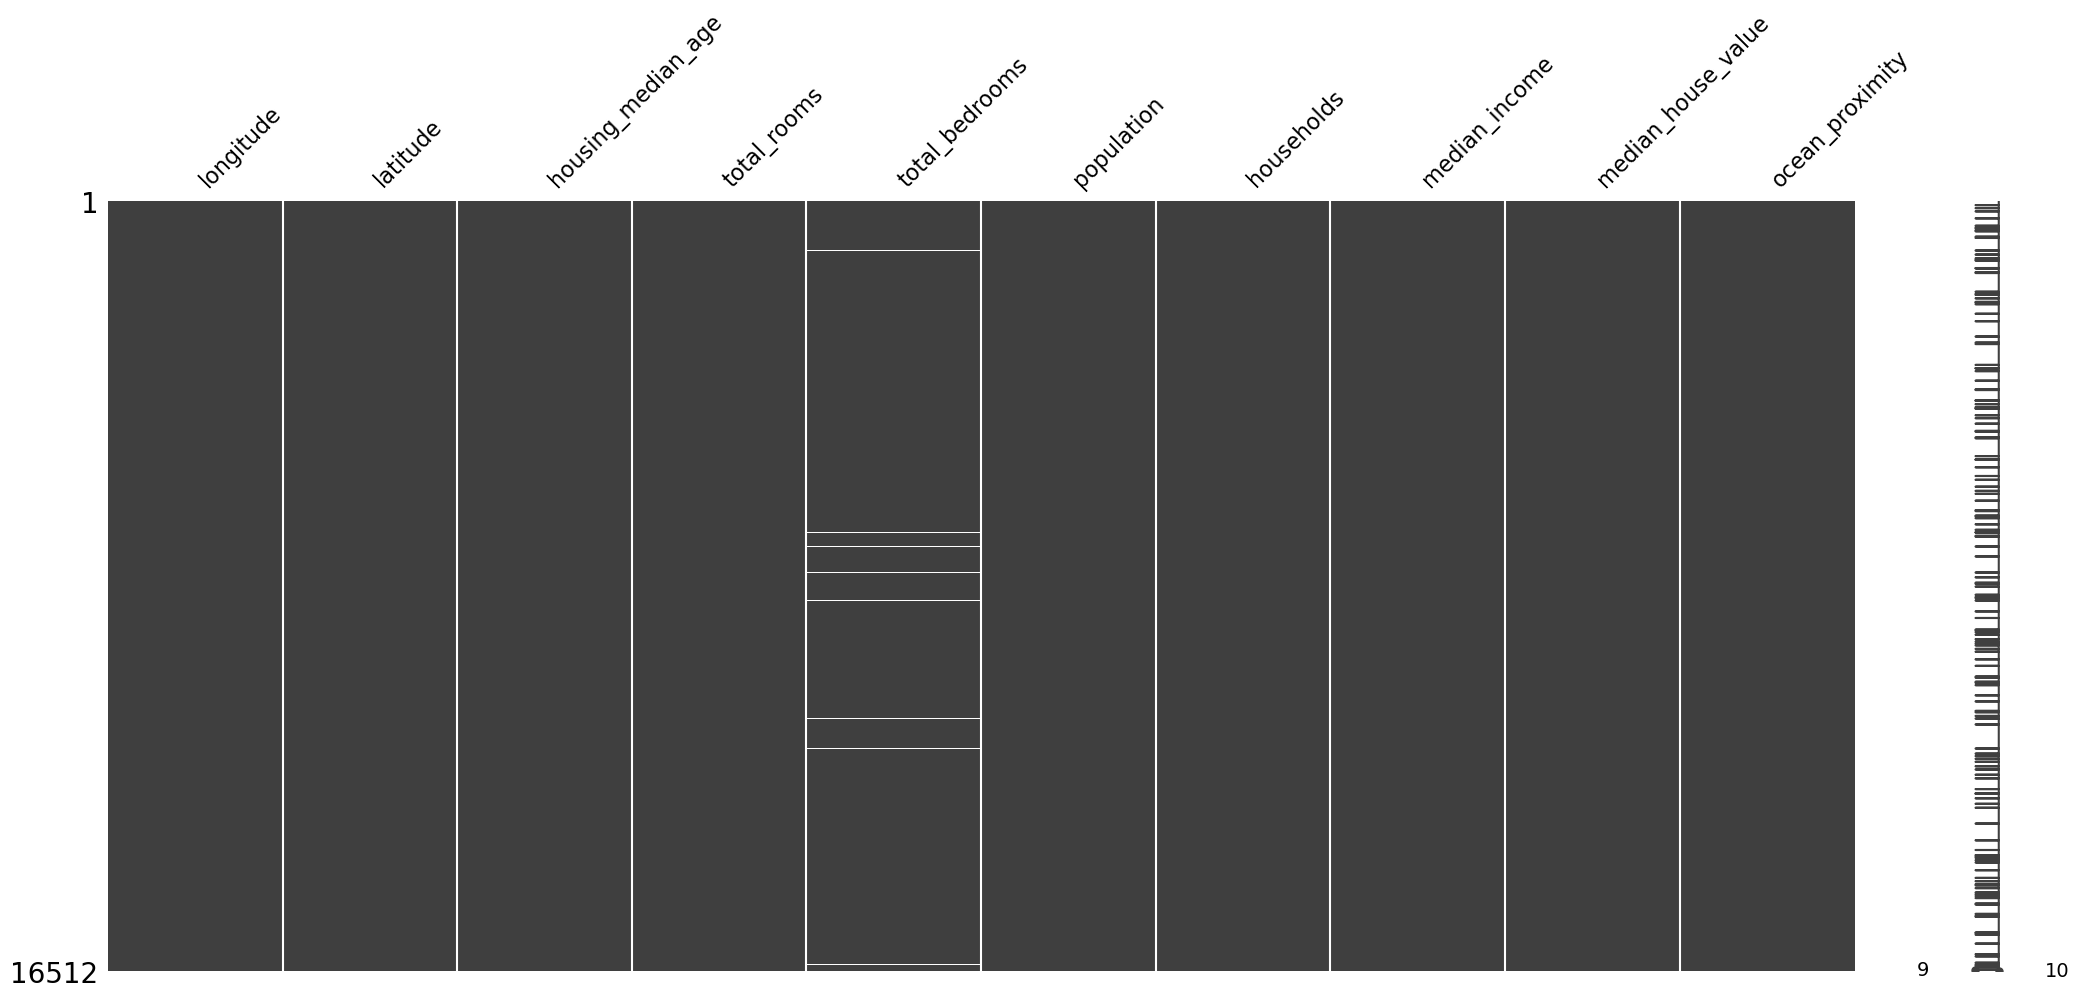

In [22]:
msno.matrix(housing)
plt.show()

In [23]:
pd.DataFrame(housing["total_bedrooms"].describe())

,total_bedrooms
count,16352.000000
mean,538.843689
std,424.824726
min,2.000000
25%,297.000000
50%,434.500000
75%,646.000000
max,6445.000000


In [24]:
housing_num = housing.select_dtypes(include=['number'])

housing_num.mean()


longitude               -119.566673
latitude                  35.630471
housing_median_age        28.679021
total_rooms             2638.244549
total_bedrooms           538.843689
population              1428.097929
households               500.261628
median_income              3.870040
median_house_value    206986.257691
dtype: float64

In [25]:
housing_num.median()

longitude               -118.5000
latitude                  34.2500
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           434.5000
population              1164.5000
households               409.0000
median_income              3.5357
median_house_value    179500.0000
dtype: float64

### Missing Value replace with Mean/Median

In [26]:
from sklearn.impute import SimpleImputer

housing_num = housing.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy="median")

# Fit the imputer on the numerical columns and Create a new dataframe with the imputed values
X = imputer.fit_transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6521,-118.03,34.06,24.0,2343.0,834.0,3537.0,824.0,2.1094,135200.0
16470,-121.26,38.12,27.0,1818.0,459.0,1182.0,428.0,1.8575,73800.0
17200,-119.75,34.50,26.0,3563.0,579.0,1479.0,575.0,5.9522,438400.0
16566,-121.45,37.72,2.0,2239.0,321.0,766.0,219.0,5.7500,240200.0
9826,-121.71,36.78,19.0,2371.0,324.0,944.0,332.0,5.9175,240200.0


In [27]:
housing_tr.isnull().any(axis=1).sum()

0

## 2) Feature Scaling

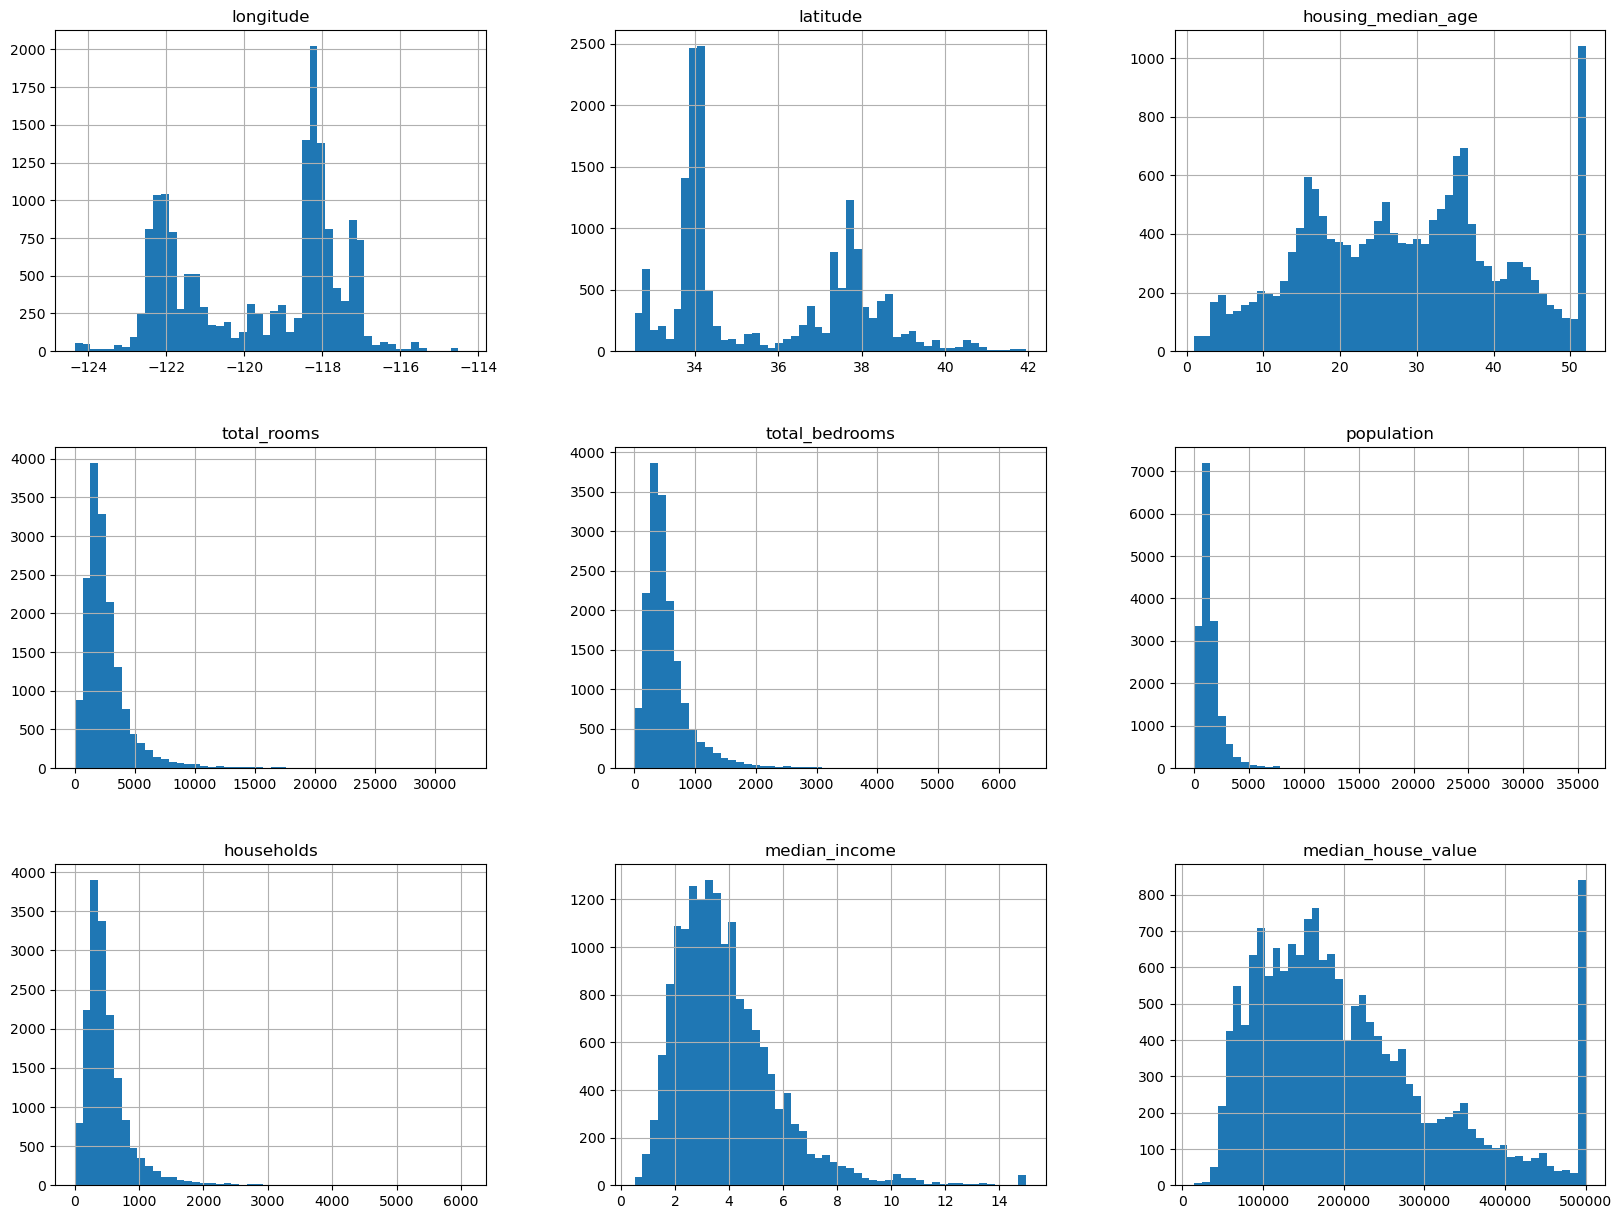

In [28]:
housing_tr.hist(bins=50, figsize=(20, 15))
plt.show()

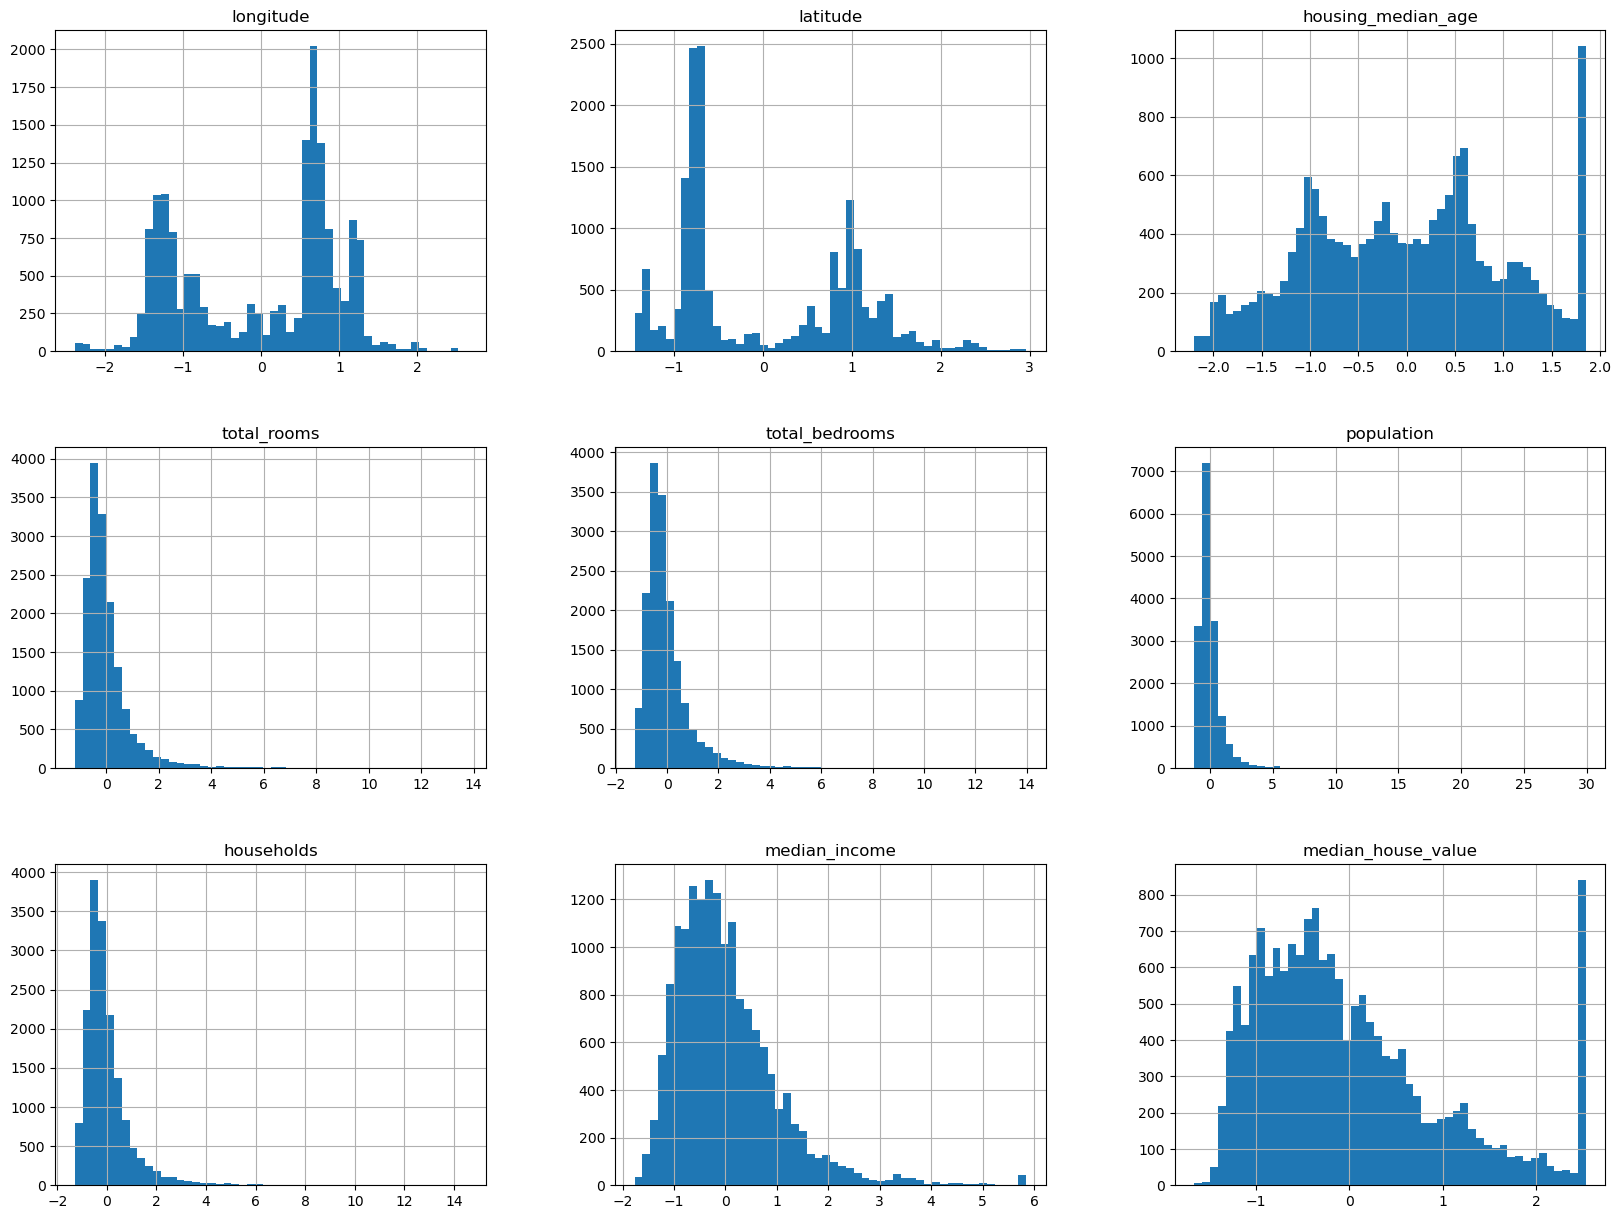

In [29]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_tr)
# type(housing_num_std_scaled)

housing_num_std_scaled_df = pd.DataFrame(
    housing_num_std_scaled, columns=housing_num.columns, index=housing_num.index
)

housing_num_std_scaled_df.hist(bins=50, figsize=(20, 15))
plt.show()

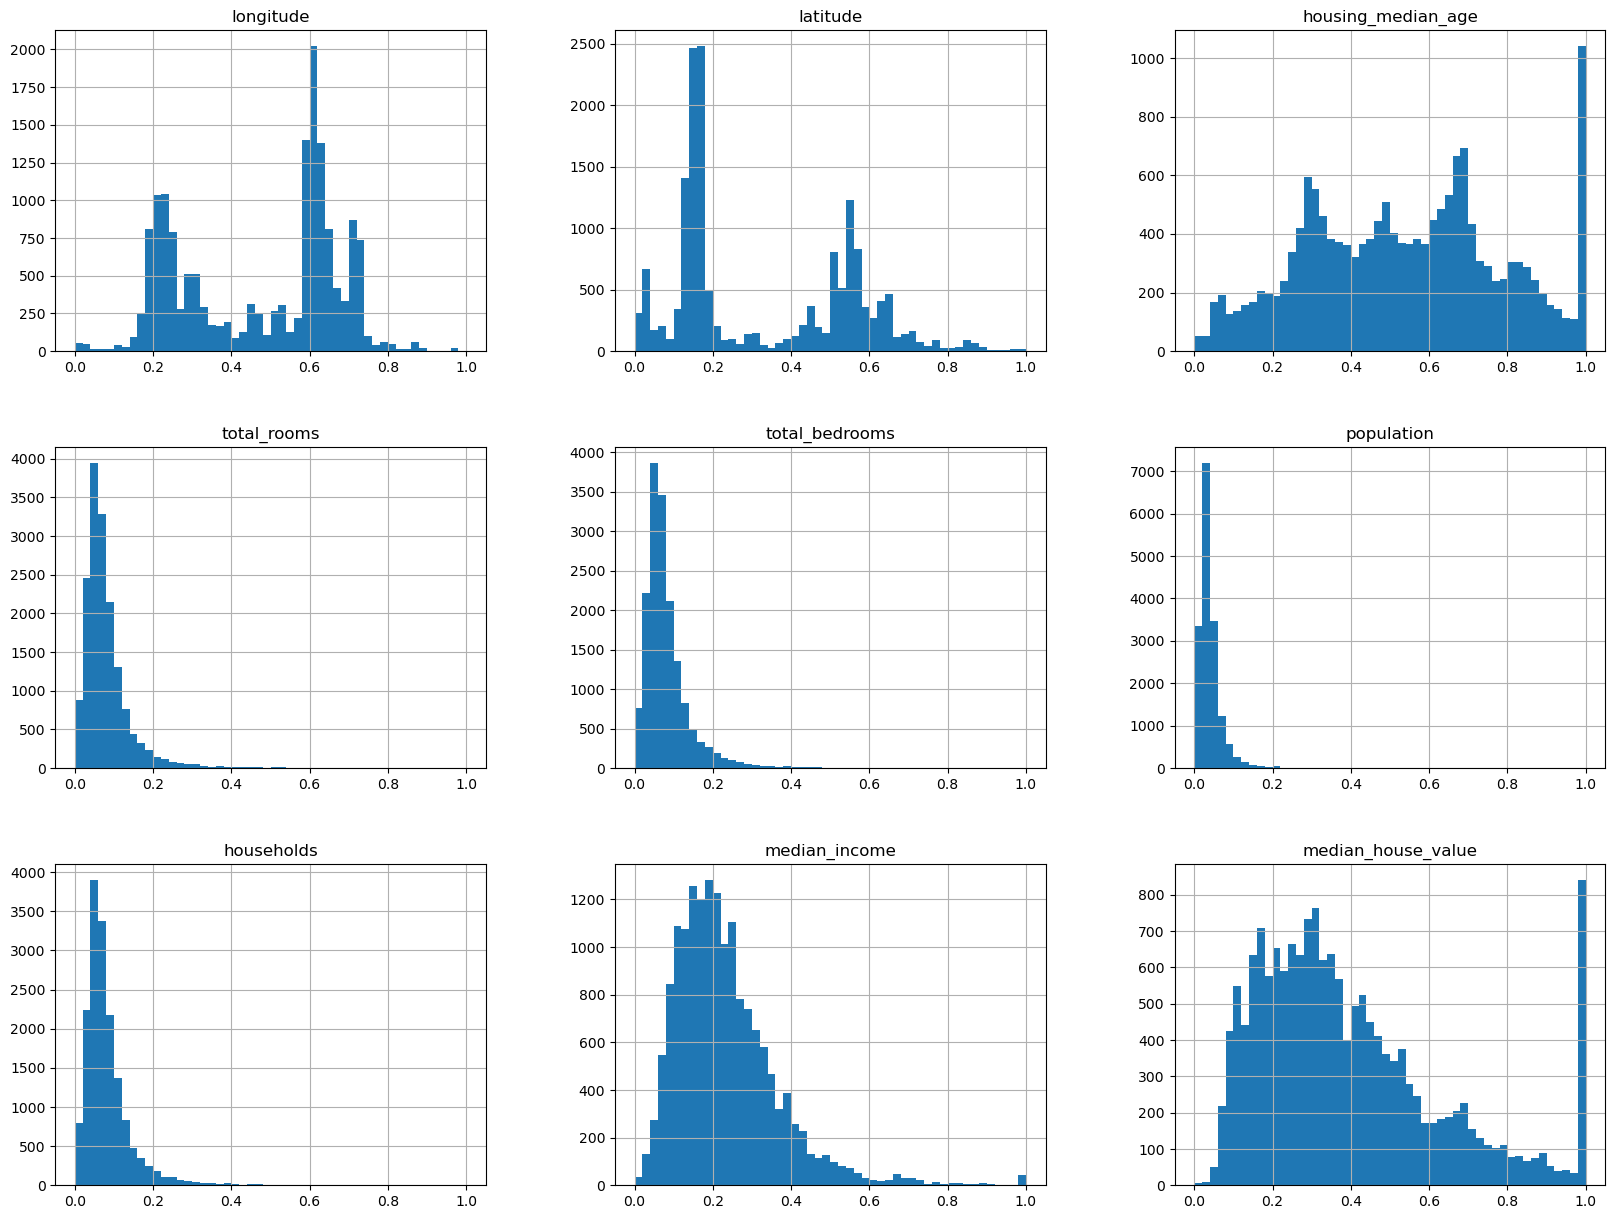

In [30]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_tr)
# type(housing_num_min_max_scaled)

housing_num_min_max_scaled_df = pd.DataFrame(
    housing_num_min_max_scaled, columns=housing_num.columns, index=housing_num.index
)

housing_num_min_max_scaled_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [36]:
housing_num_min_max_scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6521,0.629482,0.161530,0.450980,0.071755,0.129132,0.099050,0.135197,0.110998,0.247836
16470,0.307769,0.592986,0.509804,0.055663,0.070930,0.033045,0.070066,0.093626,0.121239
17200,0.458167,0.208289,0.490196,0.109149,0.089555,0.041369,0.094243,0.376016,0.872988
16566,0.288845,0.550478,0.019608,0.068567,0.049511,0.021385,0.035691,0.362071,0.464330
9826,0.262948,0.450584,0.352941,0.072613,0.049977,0.026374,0.054276,0.373622,0.464330


### Handling Categorical Variables


In [31]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
6521,<1H OCEAN
16470,INLAND
17200,<1H OCEAN
16566,INLAND
9826,<1H OCEAN


In [32]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# type(housing_cat_encoded)

housing_cat_encoded_df = pd.DataFrame(
    housing_cat_encoded, columns=housing_cat.columns, index=housing_cat.index
)

print(ordinal_encoder.categories_)

housing_cat_encoded_df

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


,ocean_proximity
6521,0.0
16470,1.0
17200,0.0
16566,1.0
9826,0.0
...,...
13784,1.0
17483,4.0
6566,1.0
1432,3.0


In [33]:
housing_cat.head()

,ocean_proximity
6521,<1H OCEAN
16470,INLAND
17200,<1H OCEAN
16566,INLAND
9826,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(sparse_output=False)
housing_cat_OHE = OHE.fit_transform(housing_cat)

# Create the DataFrame with the correct column names
encoded_columns = OHE.get_feature_names_out(housing_cat.columns)
housing_cat_OHE_df = pd.DataFrame(housing_cat_OHE, columns=encoded_columns, index=housing_cat.index)

housing_cat_OHE_df.head()

In [38]:
# Assuming 'housing_num' and 'housing_cat' are your DataFrames
Housing_num_cat = pd.concat([housing_num_min_max_scaled_df, housing_cat_encoded], axis=1)

In [39]:
Housing_num_cat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6521,0.629482,0.161530,0.450980,0.071755,0.129132,0.099050,0.135197,0.110998,0.247836,1.0,0.0,0.0,0.0,0.0
16470,0.307769,0.592986,0.509804,0.055663,0.070930,0.033045,0.070066,0.093626,0.121239,0.0,1.0,0.0,0.0,0.0
17200,0.458167,0.208289,0.490196,0.109149,0.089555,0.041369,0.094243,0.376016,0.872988,1.0,0.0,0.0,0.0,0.0
16566,0.288845,0.550478,0.019608,0.068567,0.049511,0.021385,0.035691,0.362071,0.464330,0.0,1.0,0.0,0.0,0.0
9826,0.262948,0.450584,0.352941,0.072613,0.049977,0.026374,0.054276,0.373622,0.464330,1.0,0.0,0.0,0.0,0.0
